<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None
                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849
           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


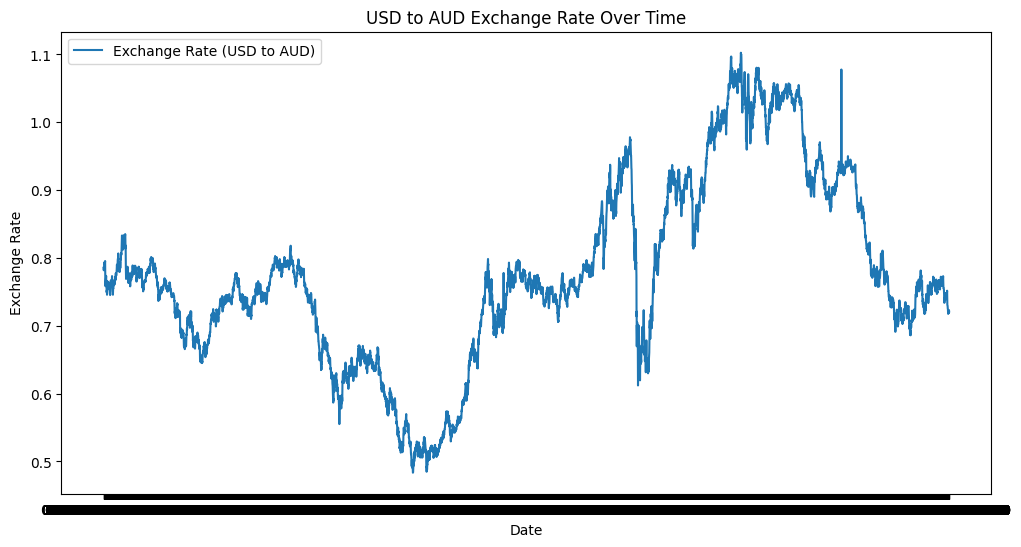

<ipython-input-3-8cb2f64cec88>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ex_rate'].fillna(method='ffill', inplace=True)
<ipython-input-3-8cb2f64cec88>:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Ex_rate'].fillna(method='ffill', inplace=True)


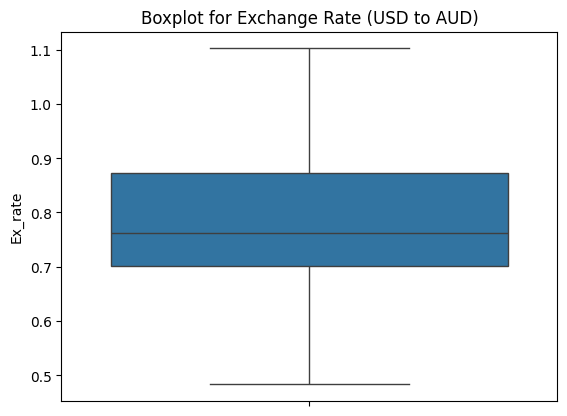

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

print(data.info())
print(data.head())
print(data.describe())

plt.figure(figsize=(12, 6))

plt.plot(data['Ex_rate'], label='Exchange Rate (USD to AUD)')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

data['Ex_rate'].fillna(method='ffill', inplace=True)

sns.boxplot(data['Ex_rate'])
plt.title('Boxplot for Exchange Rate (USD to AUD)')
plt.show()

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


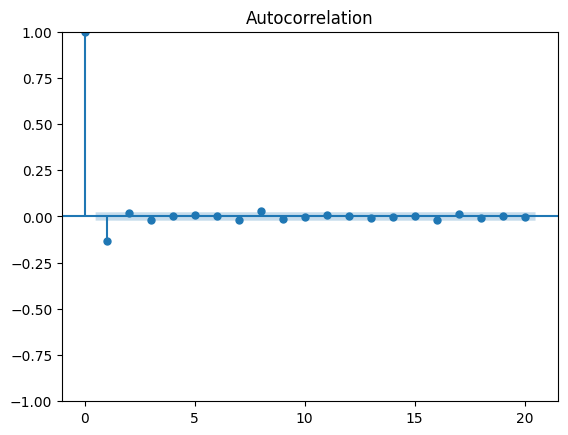

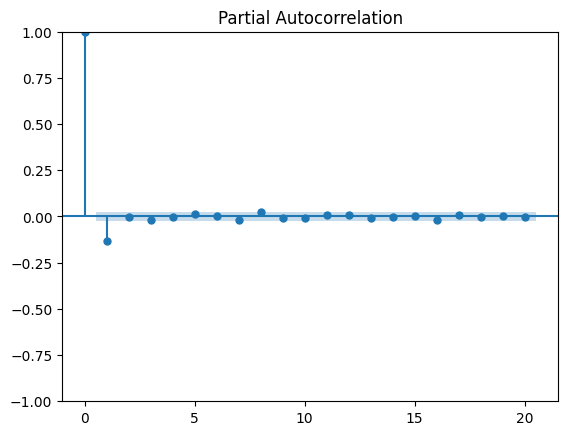

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Ex_rate' is the actual column name in your DataFrame
# Replace 'Ex_rate' with the correct name if different.
column_name = 'Ex_rate'

# Check stationarity
result = adfuller(data[column_name])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing if necessary
if result[1] > 0.05:
    # Create a new column for the differenced data
    data[column_name + '_diff'] = data[column_name].diff().dropna()

# ACF and PACF plots
# Use the differenced column if created, otherwise use the original column
plot_column = column_name + '_diff' if column_name + '_diff' in data.columns else column_name
plot_acf(data[plot_column].dropna(), lags=20)
plot_pacf(data[plot_column].dropna(), lags=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


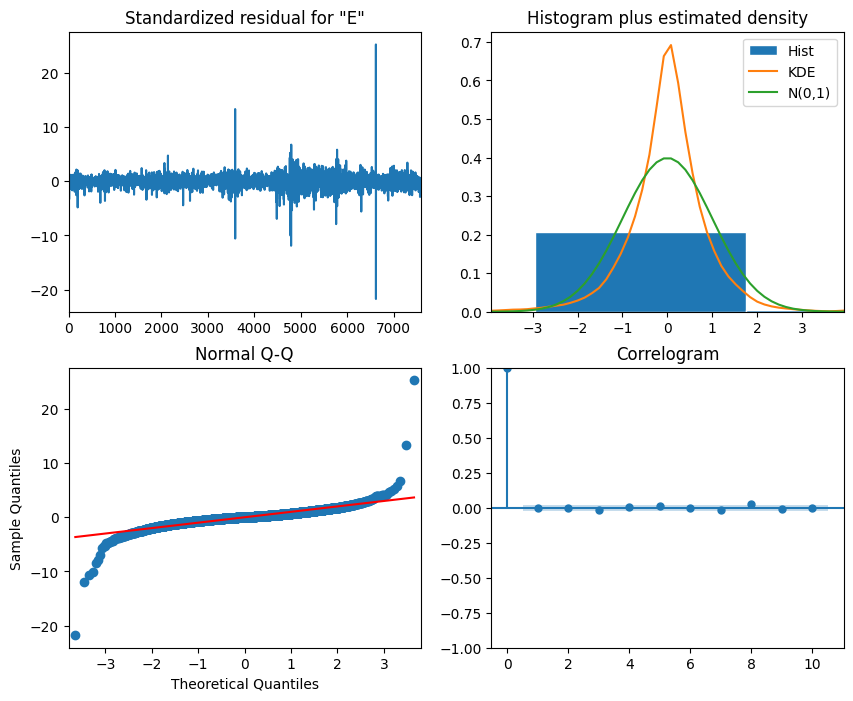

In [8]:
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))
arima_result = model.fit()

arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


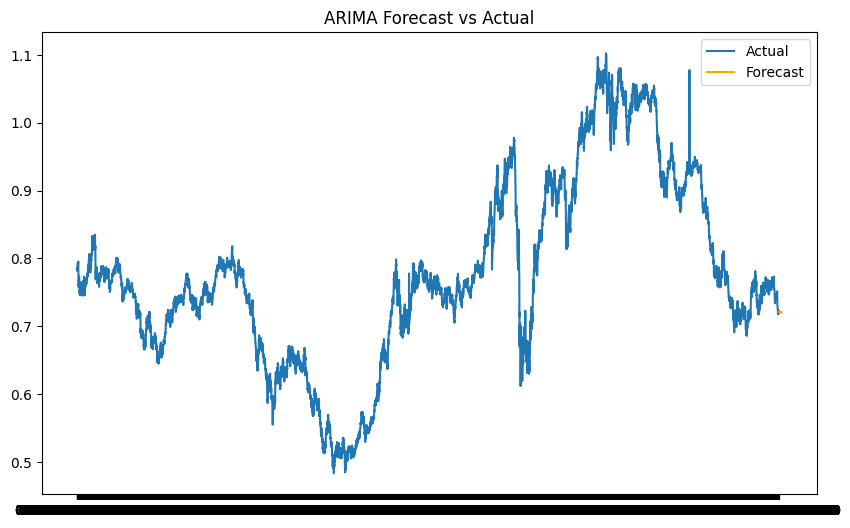

In [11]:
forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(10, 6))
# Changed 'USD_TO_AUD' to 'Ex_rate' to plot the actual exchange rate data.
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


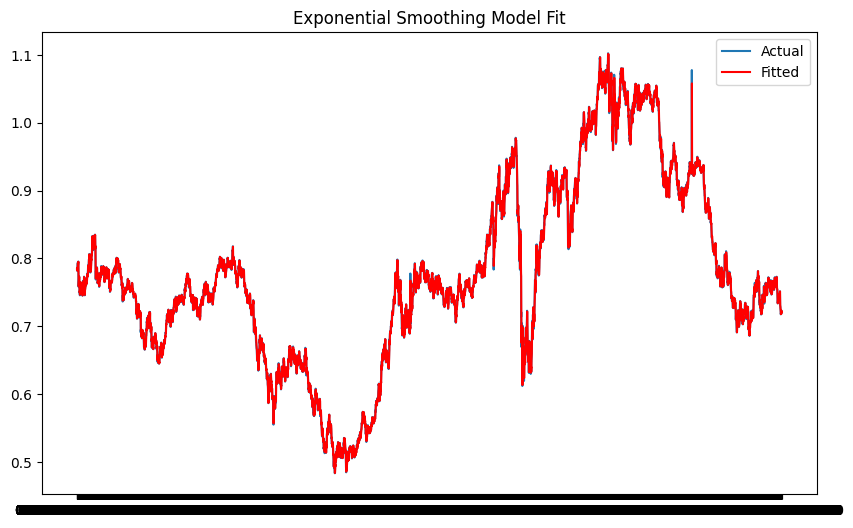

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None).fit()
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(hw_model.fittedvalues, label='Fitted', color='red')
plt.title('Exponential Smoothing Model Fit')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


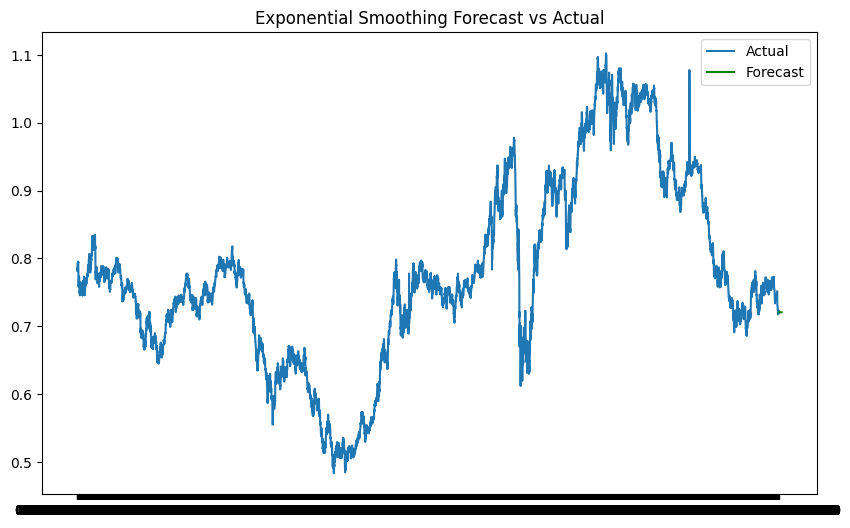

In [17]:
hw_forecast = hw_model.forecast(steps=30)
plt.figure(figsize=(10, 6))

plt.plot(data['Ex_rate'], label='Actual')
plt.plot(hw_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], forecast))

hw_mae = mean_absolute_error(data['Ex_rate'][-30:], hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], hw_forecast))

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing - MAE: {hw_mae}, RMSE: {hw_rmse}")

ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing - MAE: 0.012755756156713368, RMSE: 0.017005229952751045
